#Convolutional Neural Network for Image Classification based on CIFAR-10 Dataset

- 60000 32*32 colour images for 10 different classes
- 6000 images per class
- Classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

##CNN Architecture:


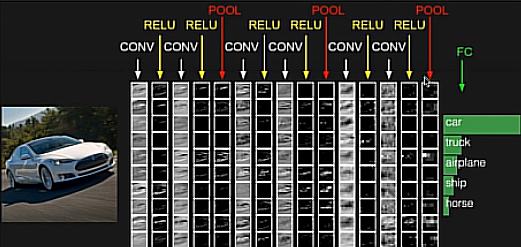

##Convolutional Filters:

- They are small, trainable matrices used to detect specific patterns in input data, such as edges, textures, or other features in an image.

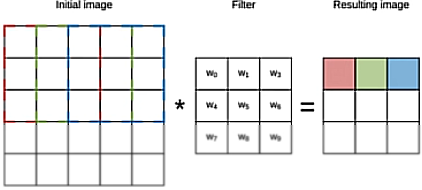

##Pooling Layers: (Max Pooling)

- Pooling applies a down-sampling operation to reduce the size of feature maps.

- Max Pooling selects the maximum value in each patch. Captures the most prominent feature in the patch.

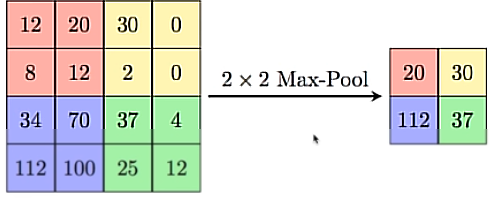

#Importing Libraries:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

#Device Configuration:

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

#Hyper-parameters:

In [ ]:
num_epochs = 5
batch_size = 4
learning_rate = 0.001

#Load Dataset:

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(
    root = '/data',
    train = True,
    download = True,
    transform = transform
)

test_dataset = torchvision.datasets.CIFAR10(
    root = '/data',
    train = False,
    download = True,
    transform = transform
)

In [ ]:
#For Batch Training:
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size = batch_size,
    shuffle = True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size = batch_size,
    shuffle = False
)

In [ ]:
classes = ('plane',
           'car',
           'bird',
           'cat',
           'deer',
           'dog',
           'frog',
           'horse',
           'ship',
           'truck')

#Implement NN:

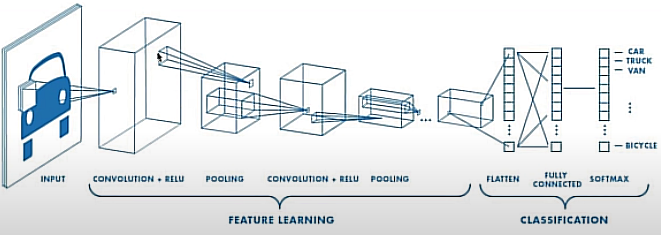

- Formula to calculate output dimensions of a convolutional layer:

Output size = ( W - F + 2P / S )  + 1

- W: Input size (Width or Height of the input image).
- F: Filter size (Kernel size).
- P: Padding (Number of pixels added to the border of the input).
- S: Stride (Step size of the filter movement), 1 by default.

In [ ]:
#The image shape is [4, 3, 32, 32], 4 is the batch size, 3 is the color channel, 32*32 is the image size

class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5) #applies a 2d convolutional layer, 3 = image color channels (RGB), 6 = output chanel size, 5 = kernel size
    #Output channels means no. of output feature maps
    #Kernel size means of 5 means a 5*5 sliding window will be applied across the input

    #Output size = (32 - 5/1) + 1 = 28
    #after applying first layer, size becomes [4, 6, 28, 28], output channel = 6, images size becomes 28*28

    self.pool = nn.MaxPool2d(2, 2) #applies a 2d Max pooling layer
    #kernel size is 2, i.e. 2*2 sliding window
    #stride is 2, the number of pixels by which the filter moves across the input.

    #Output size = (28 - 2/2) + 1 = 14
    #after applying first layer, size becomes [4, 6, 14, 14], output channel = 6, images size becomes 14*14

    self.conv2 = nn.Conv2d(6, 16, 5)

    #Output size = (14 - 5/1) + 1 = 10
    #after applying first layer, size becomes [4, 16, 10, 10], output channel = 16, images size becomes 10*10

    #Again we'll apply Maxpool layer but in forward pass

    #Output size = (10 - 2/2) + 1 = 5
    #after applying first layer, size becomes [4, 16, 5, 5], output channel = 16, images size becomes 5*5

    self.fc1 = nn.Linear(16*5*5, 120) #Inorder to flatter a 3d tensor to a 1D tensor, input size is 16*5*5
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10) #10 diff classes


  def forward(self, x):
    x = self.conv1(x) #applying first conv layer
    x = F.relu(x) #applying activation function, it doesn't change the dimensions
    x = self.pool(x) #applying max pooling layer
    x = self.conv2(x) #applying second conv layer
    x = F.relu(x)
    x = self.pool(x) #applying same max pooling layer again

    x = x.view(-1, 16*5*5) #flatening the tensor

    x = self.fc1(x)
    x = F.relu(x)
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x


In [ ]:
model = ConvNet().to(device)

#Set up Loss & Optimizer:

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#Training Loop:

In [ ]:
n_total_steps = len(train_loader)

In [ ]:
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    #origin shape: [4, 3, 32, 32] = 4, 3, 1024
    #input_layer: 3 input channels, 6 output channels, 5 kernel size
    images = images.to(device)
    labels = labels.to(device)

    #Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    #Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 2000 == 0:
      print(f'Epoch: [{epoch+1} / {num_epochs}], Step: [{i+1} / {n_total_steps}], Loss: [{loss.item():.4f}]')

print("Finished Training!")

Epoch: [1 / 5], Step: [2000 / 12500], Loss: [2.2844]
Epoch: [1 / 5], Step: [4000 / 12500], Loss: [2.2763]
Epoch: [1 / 5], Step: [6000 / 12500], Loss: [2.2045]
Epoch: [1 / 5], Step: [8000 / 12500], Loss: [1.9844]
Epoch: [1 / 5], Step: [10000 / 12500], Loss: [1.6964]
Epoch: [1 / 5], Step: [12000 / 12500], Loss: [1.6783]
Epoch: [2 / 5], Step: [2000 / 12500], Loss: [1.7881]
Epoch: [2 / 5], Step: [4000 / 12500], Loss: [1.3768]
Epoch: [2 / 5], Step: [6000 / 12500], Loss: [1.9715]
Epoch: [2 / 5], Step: [8000 / 12500], Loss: [1.7543]
Epoch: [2 / 5], Step: [10000 / 12500], Loss: [2.2836]
Epoch: [2 / 5], Step: [12000 / 12500], Loss: [1.8293]
Epoch: [3 / 5], Step: [2000 / 12500], Loss: [1.8181]
Epoch: [3 / 5], Step: [4000 / 12500], Loss: [1.8235]
Epoch: [3 / 5], Step: [6000 / 12500], Loss: [2.1725]
Epoch: [3 / 5], Step: [8000 / 12500], Loss: [1.2796]
Epoch: [3 / 5], Step: [10000 / 12500], Loss: [1.1599]
Epoch: [3 / 5], Step: [12000 / 12500], Loss: [2.0760]
Epoch: [4 / 5], Step: [2000 / 12500], Lo

#Evaluate Model:

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]

  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)

    #max returns max value, index (class)
    _, predicted = torch.max(outputs, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()

    for i in range(batch_size):
      label = labels[i]
      pred = predicted[i]
      if(label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the Model: {acc}%')

  for i in range(10):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc}%')

Accuracy of the Model: 50.27%
Accuracy of plane: 59.5%
Accuracy of car: 57.7%
Accuracy of bird: 25.4%
Accuracy of cat: 35.4%
Accuracy of deer: 38.9%
Accuracy of dog: 42.9%
Accuracy of frog: 62.0%
Accuracy of horse: 57.0%
Accuracy of ship: 59.1%
Accuracy of truck: 64.8%


#Save & Load Model:

In [ ]:
# Save model parameters
torch.save(model.state_dict(), "CIFAR10_CNN_Model_Parameters.pt")

In [ ]:
#Load model:
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load("CIFAR10_CNN_Model_Parameters.pt"))
loaded_model.eval()

<ipython-input-32-e37222fd085f>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load("CIFAR10_CNN_Model_Parameters.pt"))


ConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]

  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)

    #max returns max value, index (class)
    _, predicted = torch.max(outputs, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()

    for i in range(batch_size):
      label = labels[i]
      pred = predicted[i]
      if(label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the Model: {acc}%')

  for i in range(10):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc}%')

Accuracy of the Model: 50.27%
Accuracy of plane: 59.5%
Accuracy of car: 57.7%
Accuracy of bird: 25.4%
Accuracy of cat: 35.4%
Accuracy of deer: 38.9%
Accuracy of dog: 42.9%
Accuracy of frog: 62.0%
Accuracy of horse: 57.0%
Accuracy of ship: 59.1%
Accuracy of truck: 64.8%
